In [2]:
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt

In [3]:
# Define the object we use
import matplotlib.dates as dates
from datetime import datetime

class geminiData:
    GainLoss = 0
    Variance = 0
    Volume   = 0
    Hour     = 0
    Day      = 0
    Date     = 0;
    OpenPrice = 0
    ClosePrice = 0

geminiDatas = []

class preBubble:
    GainLoss = 0
    Variance = 0
    Volume   = 0
    Hour     = 0
    Day      = 0
    Date     = 0;

preBubble = []

geminiX = np.empty([0,1])

In [104]:
# reference to this https://realpython.com/python-csv/
import csv
from numpy import empty
import numpy as np

with open ('GEMINI_BTC.csv') as csv_file:
    
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    x = 0
    innerbatch = []
    batches = []
    for row in csv_reader:
        if line_count >= 2:
            line_count += 1
            #1: Date
            #2: Symbol
            #3: Open
            #4: High
            #5: Low
            #6: Close
            #7: Volume
            temp = geminiData()
            
            temp.OpenPrice = float(row[3])
            temp.ClosePrice = float(row[6])
            temp.OpenPrice = int(temp.OpenPrice)
            temp.ClosePrice = int(temp.ClosePrice)
            # Gain loss
            
            temp.GainLoss = temp.OpenPrice - temp.ClosePrice
            # Variance
            temp.Variance = float(row[4]) - float(row[5])
            # Volume 
            temp.Volume = float( (row[7]))
            # Hour
            temp.Hour = row[1].split(" ")[1].split(":")[0]
            # Day
            temp.Day = row[1].split(" ")[0].split("-")[2]
            # Date YYYY-MM-DD ref: https://www.journaldev.com/23365/python-string-to-datetime-strptime
            datetime_str = row[1]

            datetime_object = datetime.strptime(datetime_str, '20%y-%m-%d %H:%M:%S')

             #print(datetime_object)  # printed in default format
            
            temp.Date = datetime_object
            geminiDatas.append(temp) 
            geminiX =  np.append( geminiX ,[[temp.OpenPrice]], axis = 0)
            
            innerbatch.append(temp)

            if(temp.Hour == '01'):
                batches.append(innerbatch)
                innerbatch = []
                
                
        else:
            line_count += 1
            batches.append(innerbatch)

In [99]:
t_min, t_max = 0, 30
resolution = 0.1

n_steps = 20
t_instance = np.linspace(12.2, 12.2 + resolution * (n_steps + 1), n_steps + 1)

def time_series(t):
    return t * np.sin(t) / 3 + 2 * np.sin(t*5)

def next_batch(batch_size, n_steps):
    Data = np.empty([0,21], float)
    for x in range(batch_size):
        rand = np.random.randint(len(geminiX)-50)
        temp = np.empty([0,1])
        for i in range(n_steps+1):
            temp =  np.append(temp,geminiX[rand + i])
            i += 1
        Data = np.append(Data,[temp], axis=0)
        x += 1
    
    return Data[:, :-1].reshape(-1, n_steps, 1), Data[:, 1:].reshape(-1, n_steps, 1)        


In [89]:
temp, temp1 = next_batch(50,20)
print(f' temp: {temp.shape} ' )

 temp: (50, 20, 1) 


In [92]:
#reset_graph()
tf.reset_default_graph()

n_steps = 20
n_inputs = 1
n_neurons = 100
n_outputs = 1

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32, [None, n_steps, n_outputs])

In [93]:
cell = tf.contrib.rnn.OutputProjectionWrapper(
    tf.nn.rnn_cell.BasicRNNCell(num_units=n_neurons, activation=tf.nn.relu),
    output_size=n_outputs)


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
This class is equivalent as tf.keras.layers.SimpleRNNCell, and will be replaced by that in Tensorflow 2.0.


In [94]:
outputs, states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)

Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Colocations handled automatically by placer.


In [95]:
learning_rate = 0.001

loss = tf.reduce_mean(tf.square(outputs - y)) # MSE
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()

In [96]:
saver = tf.train.Saver()

In [ ]:
n_iterations = 5500
batch_size = 50

with tf.Session() as sess:
    init.run()
    for iteration in range(n_iterations):
        X_batch, y_batch = next_batch(batch_size, n_steps)
       # print(X_batch, "\t xy:", y_batch)
        sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        if iteration % 100 == 0:
            mse = loss.eval(feed_dict={X: X_batch, y: y_batch})
            print(iteration, "\tMSE:", mse)
    
    saver.save(sess, "./my_time_series_model") # not shown in the book

0 	MSE: 17922150.0
100 	MSE: 354738.3
200 	MSE: 185213.05
300 	MSE: 66612.59
400 	MSE: 5705.38
500 	MSE: 5993.765
600 	MSE: 5715.409
700 	MSE: 1649.9098
800 	MSE: 4196.084
900 	MSE: 3299.8018
1000 	MSE: 3173.5234
1100 	MSE: 3301.56
1200 	MSE: 10278.314
1300 	MSE: 1878.208
1400 	MSE: 2078.4387
1500 	MSE: 1514.036
1600 	MSE: 3749.3044
1700 	MSE: 4382.553
1800 	MSE: 3829.8152
1900 	MSE: 2964.7285
2000 	MSE: 2017.786
2100 	MSE: 3040.4824
2200 	MSE: 2383.264
2300 	MSE: 3652.4714
2400 	MSE: 5945.271
2500 	MSE: 5360.8867
2600 	MSE: 4638.649
2700 	MSE: 5548.334
2800 	MSE: 3845.319
2900 	MSE: 5932.896
3000 	MSE: 12061.515
3100 	MSE: 3559.367
3200 	MSE: 1601.2567
3300 	MSE: 5859.139
3400 	MSE: 4834.009
3500 	MSE: 3458.535
3600 	MSE: 5502.3896
3700 	MSE: 7755.2803
3800 	MSE: 4632.902
3900 	MSE: 4388.1377
4000 	MSE: 5099.067
4100 	MSE: 5033.192
4200 	MSE: 4455.343
4300 	MSE: 3367.619
4400 	MSE: 5806.611


In [106]:
with tf.Session() as sess:                          # not shown in the book
    saver.restore(sess, "./my_time_series_model")   # not shown

    X_new = time_series(np.array(t_instance[:-1].reshape(-1, n_steps, n_inputs)))
    y_pred = sess.run(outputs, feed_dict={X: X_new})

INFO:tensorflow:Restoring parameters from ./my_time_series_model


In [107]:
y_pred

array([[[ 0.19827645],
        [ 1.3911103 ],
        [ 0.04511922],
        [ 0.16796482],
        [ 0.08840978],
        [-0.08797324],
        [-0.09302521],
        [-0.23235321],
        [-0.29889035],
        [-0.25642872],
        [-0.19774401],
        [-0.11859834],
        [-0.06098676],
        [-0.05418373],
        [-0.11261082],
        [-0.15637577],
        [-0.18060839],
        [-0.2591939 ],
        [-0.23549652],
        [-0.20064634]]], dtype=float32)

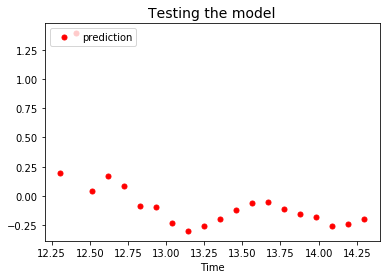

In [108]:
plt.title("Testing the model", fontsize=14)
#plt.plot(t_instance[:-1], time_series(t_instance[:-1]), "bo", markersize=10, label="instance")
#plt.plot(t_instance[1:], X_batch[0,:,0], "w*", markersize=10, label="target")
plt.plot(t_instance[1:], y_pred[0,:,0], "r.", markersize=10, label="prediction")
plt.legend(loc="upper left")
plt.xlabel("Time")

plt.show()